In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tqdm import tqdm_notebook as tqdm
from copy import copy, deepcopy
from tensorflow.keras import datasets, layers, models, Sequential
from skimage import color

from utils import *
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard
BATCH_SIZE = 16

In [19]:
load_data = tfds.load("cifar10")
train, test = load_data["train"], load_data["test"]

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
images = load_images_from_folder('boats')

In [5]:
train_images, test_images = train_test_split(images, test_size=0.1)

In [15]:
train_images = [np.array(data["image"]) for data in train]

In [16]:
len(train_images)

50000

In [ ]:
for index, data in enumerate(train.shuffle(1000).take(20)):
    if index % 2 == 0:
        plt.figure(figsize=(15, 5))
        base_index = 1
    else:
        base_index = 4
        
    plt.subplot(1, 5, base_index)
    plt.imshow(data["image"])

    new_feature, new_label = pre_process(data["image"], 64)
    reconstructed_image = process_output(new_feature, new_label, tuple(data["image"].shape)[:2], 64)
    plt.subplot(1, 5, base_index + 1)
    plt.imshow(reconstructed_image)

E0507 18:36:21.802767 4496106944 zmqstream.py:435] Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/reniel96/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/reniel96/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/reniel96/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/reniel96/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/reniel96/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/reniel96/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = sh

In [5]:
N_BINS = 313

In [10]:
from tensorflow.keras.layers import *
def Model():
    model = Sequential()
        ############################
        #########  Conv 1  #########
        ############################

        # (batch_size, 32, 32, 1) --> (batch_size, 16, 16, 8)
    model.add(Conv2D(filters=8, kernel_size=3,
                              padding='same',
                              activation='relu',
                              input_shape=(32, 32, 1)))
    model.add(Conv2D(filters=8, kernel_size=3,
                              strides=(2, 2),
                              padding='same',
                              activation='relu'))
    model.add(BatchNormalization())
        
        ############################
        #########  Conv 2  #########
        ############################
        
        # (batch_size, 16, 16, 8) --> (batch_size, 8, 8, 16)
    model.add(Conv2D(filters=16, kernel_size=3,
                              padding='same',
                              activation='relu'))
    model.add(Conv2D(filters=16, kernel_size=3,
                              strides=(2, 2),
                              padding='same',
                              activation='relu'))
    model.add(BatchNormalization())

        ############################
        #########  Conv 3  #########
        ############################
        
        # (batch_size, 8, 8, 16)  --> (batch_size, 4, 4, 32)
    model.add(layers.Conv2D(filters=32, kernel_size=3,
                                     padding='same',
                                     activation='relu'))
    model.add(layers.Conv2D(filters=32, kernel_size=3,
                                     padding='same',
                                     activation='relu'))
    model.add(layers.Conv2D(filters=32, kernel_size=3,
                                     strides=(2, 2),
                                     padding='same',
                                     activation='relu'))
    model.add(BatchNormalization())
        
        ############################
        #########  Conv 4  #########
        ############################
        
        # (batch_size, 4, 4, 32) --> (batch_size, 4, 4, 64)
    model.add(Conv2D(filters=64, kernel_size=3,
                              strides=(1, 1),
                              padding='same',
                              activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3,
                              strides=(1, 1),
                              padding='same',
                              activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3,
                              strides=(1, 1),
                              padding='same',
                              activation='relu'))
    model.add(BatchNormalization())
        
        ############################
        #########  Conv 5  #########
        ############################
        
        # (batch_size, 4, 4, 64) --> (batch_size, 8, 8, 32)
    model.add(Conv2D(filters=64, kernel_size=3,
                              strides=(1, 1),
                              padding='same',
                              activation='relu',
                              dilation_rate=2))
    model.add(Conv2D(filters=64, kernel_size=3,
                              strides=(1, 1),
                              padding='same',
                              activation='relu',
                              dilation_rate=2))
    model.add(Conv2D(filters=64, kernel_size=3,
                              strides=(1, 1),
                              padding='same',
                              activation='relu',
                              dilation_rate=2))
    model.add(BatchNormalization())
        
        ############################
        #########  Conv 6  #########
        ############################
        
        # (batch_size, 8, 8, 32) --> (batch_size, 16, 16, 32)
    model.add(Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu',
                              dilation_rate=2))
    model.add(Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu',
                              dilation_rate=2))
    model.add(Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu',
                              dilation_rate=2))
    model.add(BatchNormalization())
        
        ############################
        #########  Conv 7  #########
        ############################
        
        # (batch_size, 16, 16, 32) --> (batch_size, 32, 32, 32)
    model.add(Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu',
                              dilation_rate=1))
    model.add(Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu',
                              dilation_rate=1))
    model.add(Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu',
                              dilation_rate=1))
    model.add(BatchNormalization())
        
        ############################
        #########  Conv 8  #########
        ############################
        
        # (batch_size, 16, 16, 32) --> (batch_size, 64, 64, 32)
    model.add(Conv2DTranspose(filters=32, kernel_size=4,
                                       strides=(2, 2),
                                       padding='same',
                                       activation='relu',
                                       dilation_rate=1))
    model.add(Conv2DTranspose(filters=32, kernel_size=3,
                              strides=(2, 2),
                              padding='same',
                              activation='relu',
                              dilation_rate=1))
    model.add(Conv2DTranspose(filters=32, kernel_size=3,
                              strides=(2, 2),
                              padding='same',
                              activation='relu',
                              dilation_rate=1))
        
        ############################
        ####  Unary prediction  ####
        ############################
        
        # (batch_size, 64, 64, 32) --> (batch_size, 32, 32, n_bins)
    model.add(Conv2D(filters=N_BINS,
                               kernel_size=1,
                               activation='softmax',
                               strides=(1, 1),
                               dilation_rate=1))
    return model
        
model = Model()

In [12]:
model.load_weights('weights.h5')

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 32, 32, 8)         80        
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 8)         584       
_________________________________________________________________
batch_normalization_v2_14 (B (None, 16, 16, 8)         32        
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 16)          2320      
_________________________________________________________________
batch_normalization_v2_15 (B (None, 8, 8, 16)          64        
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 8, 32)         

In [26]:
def train_generator(n_bins):
    while True:
        gen = data_generator(train_images, n_bins)
        for features, labels in gen:
            inputs = []
            targets = []
            for i in range(BATCH_SIZE):
                #print(np.expand_dims(labels, -1)[:,:,0].shape)
                inputs.append(np.expand_dims(features, -1))
                targets.append(np.expand_dims(labels, -1)[:,:,0])
            yield np.array(inputs), np.array(targets)

In [27]:
train_gen = train_generator(N_BINS)

In [28]:
import datetime

class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_batch_begin(self, batch, logs=None):
    print('Training: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

  def on_train_batch_end(self, batch, logs=None):
    print('Training: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_begin(self, batch, logs=None):
    print('Evaluating: batch {} begins at {}'.format(batch, datetime.datetime.now().time()))

  def on_test_batch_end(self, batch, logs=None):
    print('Evaluating: batch {} ends at {}'.format(batch, datetime.datetime.now().time()))

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',)

last_epoch = 0

model.fit_generator(train_gen, steps_per_epoch=120000/BATCH_SIZE, verbose=1,
                    callbacks=[MyCustomCallback()], epochs=5, initial_epoch=last_epoch)

model.save_weights("weights.h5")

NameError: name 'train_gen' is not defined

In [14]:
test_images = [np.array(data["image"]) for data in test]
def test_generator(n_bins):
    while True:
        gen = data_generator(test_images, n_bins)
        for features, labels in gen:
            inputs = [np.expand_dims(features, -1)]
            yield np.array(inputs)#, np.array(targets)
test_gen = test_generator(N_BINS)

In [17]:
img = next(train_gen)

NameError: name 'train_gen' is not defined

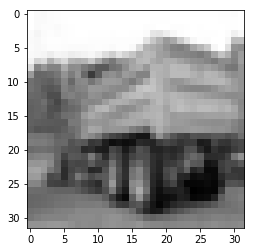

In [41]:
plt.imshow(img[0,:,:,0], cmap="gray")

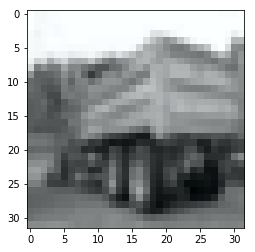

In [42]:
predict = model.predict(img)
test_luminance = img[0,:,:,0]
test_ab_bins = predict.argmax(axis=3)[0,:,:]
test_ab = process_output(test_luminance, test_ab_bins, (32,32), N_BINS)
plt.imshow(test_ab)

In [6]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
page = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02512053")
print(page.content)

soup = BeautifulSoup(page.content, 'html.parser')

b'http://static.flickr.com/3079/2297060484_797db096f7.jpg\r\nhttp://animal.discovery.com/news/afp/20060123/gallery/tinyfish_zoom.jpg\r\nhttp://farm3.static.flickr.com/2210/2513104805_454636c343.jpg\r\nhttp://www.fishingnj.org/jpegs/porskele.jpg\r\nhttp://farm2.static.flickr.com/1034/815158154_7008c486e9.jpg\r\nhttp://www.genomenewsnetwork.org/gnn_images/news_content/11_01/Pufferfish/Pufferfish_T_2.jpg\r\nhttp://www.jyi.org/articleimages/288/originals/img0.jpg\r\nhttp://www.surreycc.gov.uk/SCCWebsite/SCCWSImages.nsf/WebLookupImageByUNID/docid651322306DE6D22A80257107004A1098/$FILE/Fish-selection.gif\r\nhttp://farm3.static.flickr.com/2049/1778134124_32b7519e4b.jpg\r\nhttp://kanyemba.com/Images-html/fish.jpg\r\nhttp://www.istockphoto.com/file_thumbview_approve/4707715/2/istockphoto_4707715_hard_coral_reef_with_school_of_snappers_ans_sweetlips.jpg\r\nhttp://beachhillel.org/wp-content/uploads/Rachel__s_pictures/Yonah_and_the_Fish.JPG\r\nhttp://naturopathicretreatcenter.com/images/fish_seafoo

In [10]:
str_soup=str(soup)#convert soup to string so it can be split
type(str_soup)
split_urls=str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(split_urls))#print the length of the list so you know how many urls you have

1308
